<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/working_with_missing_data_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
date= pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [7]:
date.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
date.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'number of houses')

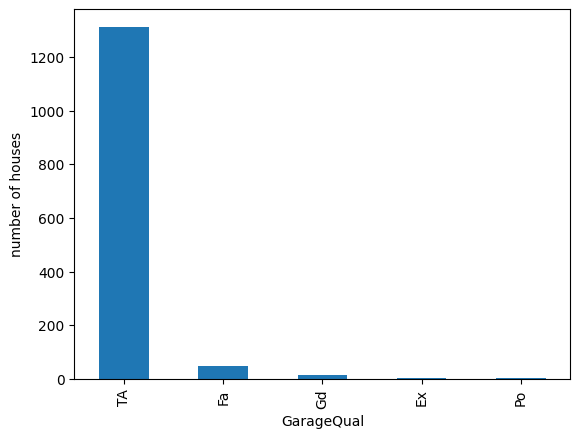

In [17]:
date['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("number of houses")

In [19]:
date['GarageQual'].mode()

,GarageQual
0,TA


# **Plotting**

Text(0.5, 1.0, 'GarageQual')

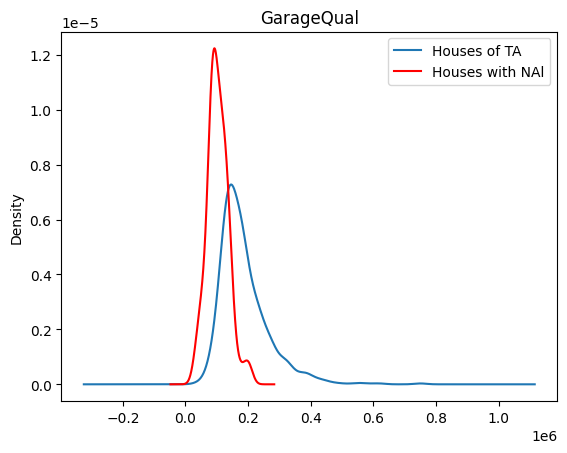

In [22]:
fig = plt.figure()
ax=fig.add_subplot(111)

date[date['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

date[date['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses of TA','Houses with NAl']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [23]:
temp = date[date['GarageQual']=='TA']['SalePrice']
temp1 = date[date['GarageQual'].isnull()]['SalePrice']

In [25]:
date['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

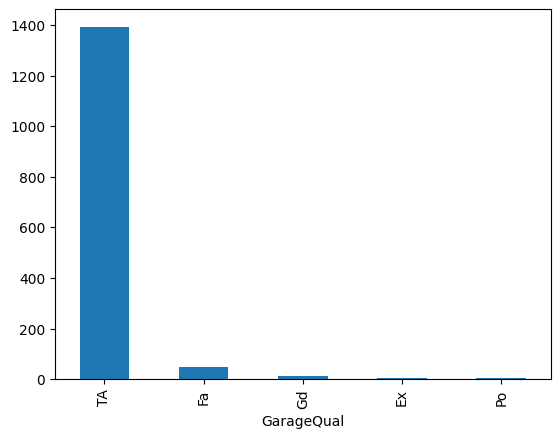

In [26]:
date['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'BmstQual')

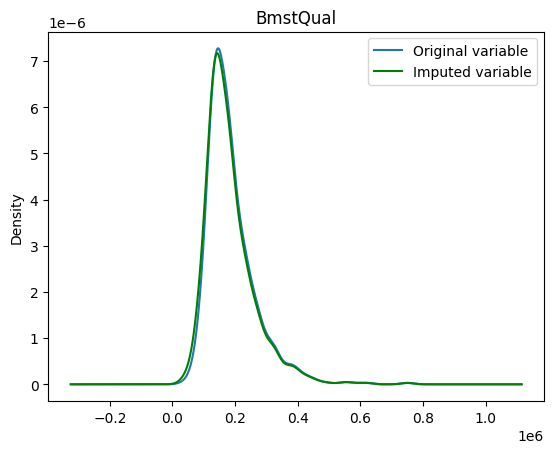

In [30]:
fig = plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)

date[date['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('BmstQual')

<Axes: xlabel='FireplaceQu'>

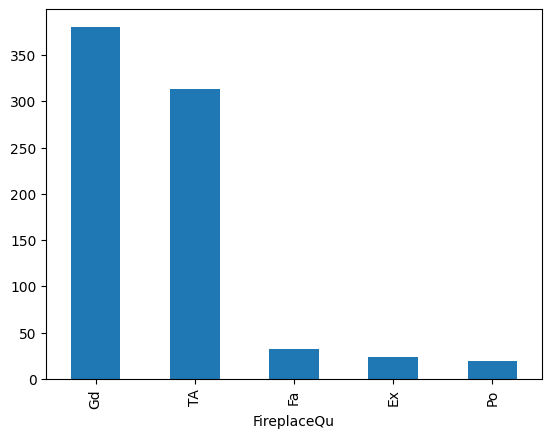

In [32]:
date['FireplaceQu'].value_counts().plot(kind='bar')

In [39]:
date['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

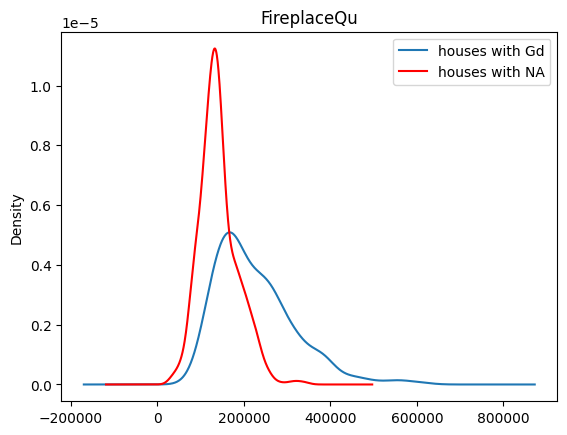

In [40]:
fig = plt.figure()
ax=fig.add_subplot(111)

date[date['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

date[date['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['houses with Gd','houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

# **USING SKLEARN**

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x=date.drop(columns=['SalePrice'])
y=date['SalePrice']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
X_train.head()

,FireplaceQu,GarageQual
344,NaN,TA
591,Gd,TA
284,NaN,TA
1206,NaN,TA
1110,TA,TA


In [47]:
y_train.head()

,SalePrice
344,85000
591,451950
284,179200
1206,107000
1110,188000


In [48]:
from sklearn.impute import SimpleImputer

In [49]:
imputer = SimpleImputer(strategy='most_frequent')

In [50]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [51]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# **MISSING CATEGORY IMPUTATION**

In [53]:
date['GarageQual'].fillna('Missing',inplace=True)

Text(0, 0.5, 'number of houses')

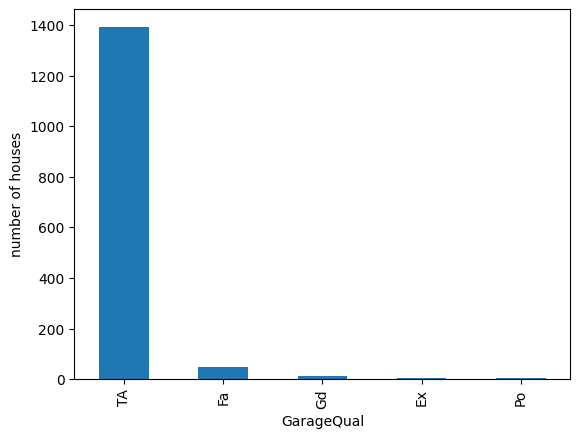

In [54]:
date['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("number of houses")

# **USING SKLEARN**

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
imputrr=SimpleImputer(strategy='constant',fill_value='missing')

In [57]:
X_train=imputrr.fit_transform(X_train)
X_test=imputrr.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [58]:
imputrr.statistics_

array(['missing', 'missing'], dtype=object)